<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/decision-tree-regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다중선형 회귀분석 (BIg Data 분석-(1) 50쪽)**

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.tree import export_graphviz, DecisionTreeRegressor
import graphviz

from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [46]:
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

### **데이터 구성하기**

In [47]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/체질검사.csv')

print(df_raw.shape)
df_raw.head()

(252, 14)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [49]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

In [50]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                                df_raw_y,
                                                                test_size = 0.3,
                                                                random_state = 1234)

print('Train data X size : {}'.format(df_train_x.shape))
print('Train data Y size : {}'.format(df_train_y.shape))
print('Test data X size : {}'.format(df_test_x.shape))
print('Test data Y size : {}'.format(df_test_y.shape))

Train data X size : (176, 13)
Train data Y size : (176,)
Test data X size : (76, 13)
Test data Y size : (76,)


### **모델 생성**

In [51]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.345


#### **모델 파라미터 조정하기 : min_samples_leaf**

In [52]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeRegressor(random_state = 1234,
                                 min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [53]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


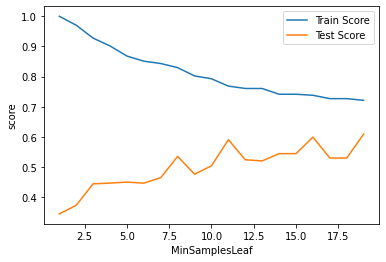

In [54]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

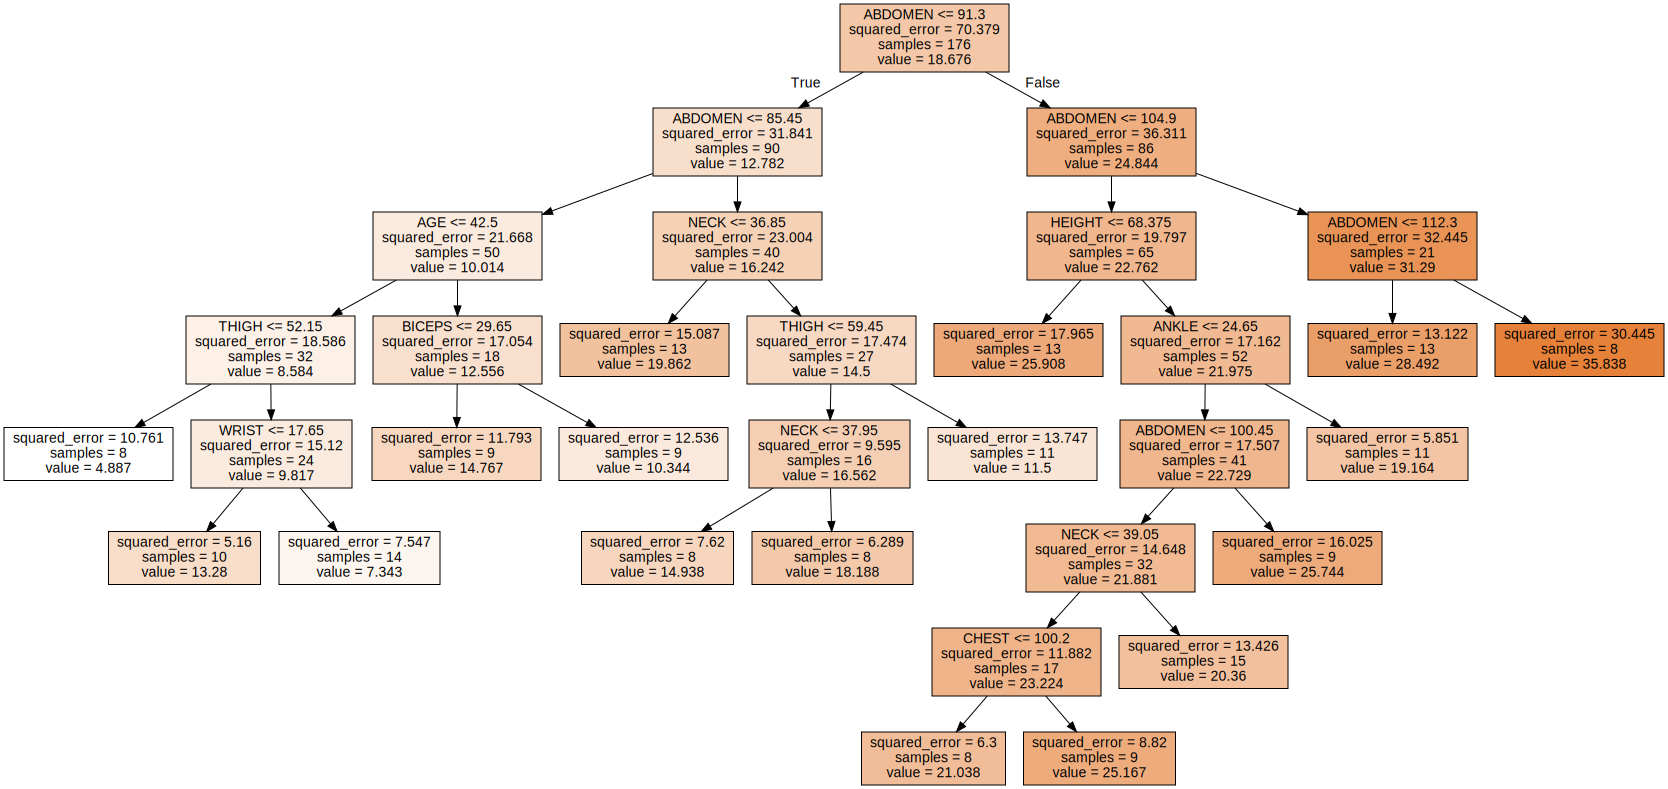

In [57]:
# 나무구조 시각화 : min_samples_leaf = 8

v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234,
                                   min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

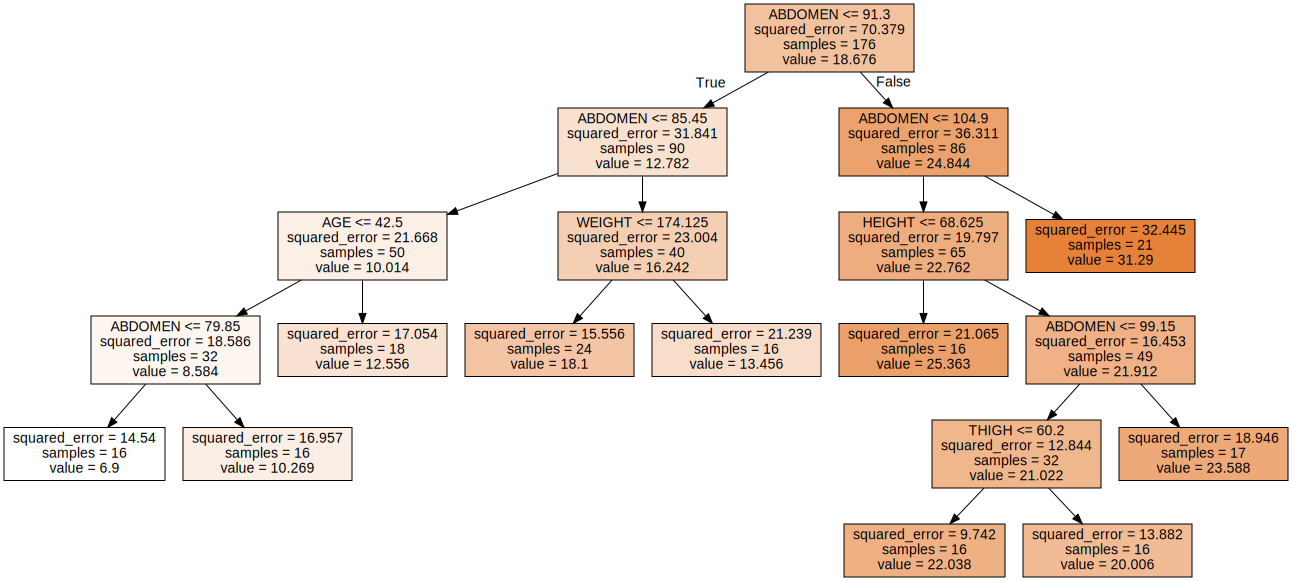

In [56]:
# 나무구조 시각화 : min_samples_leaf = 16

v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234,
                                   min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **모델 파라미터 조정하기 : min_samples_split**

In [58]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split :
    tree = DecisionTreeRegressor(random_state = 1234,
                                 min_samples_leaf = 8,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [59]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


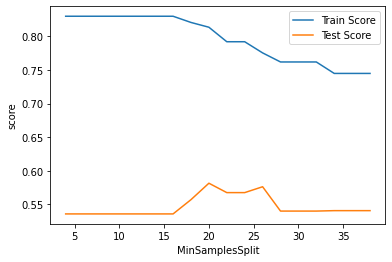

In [60]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

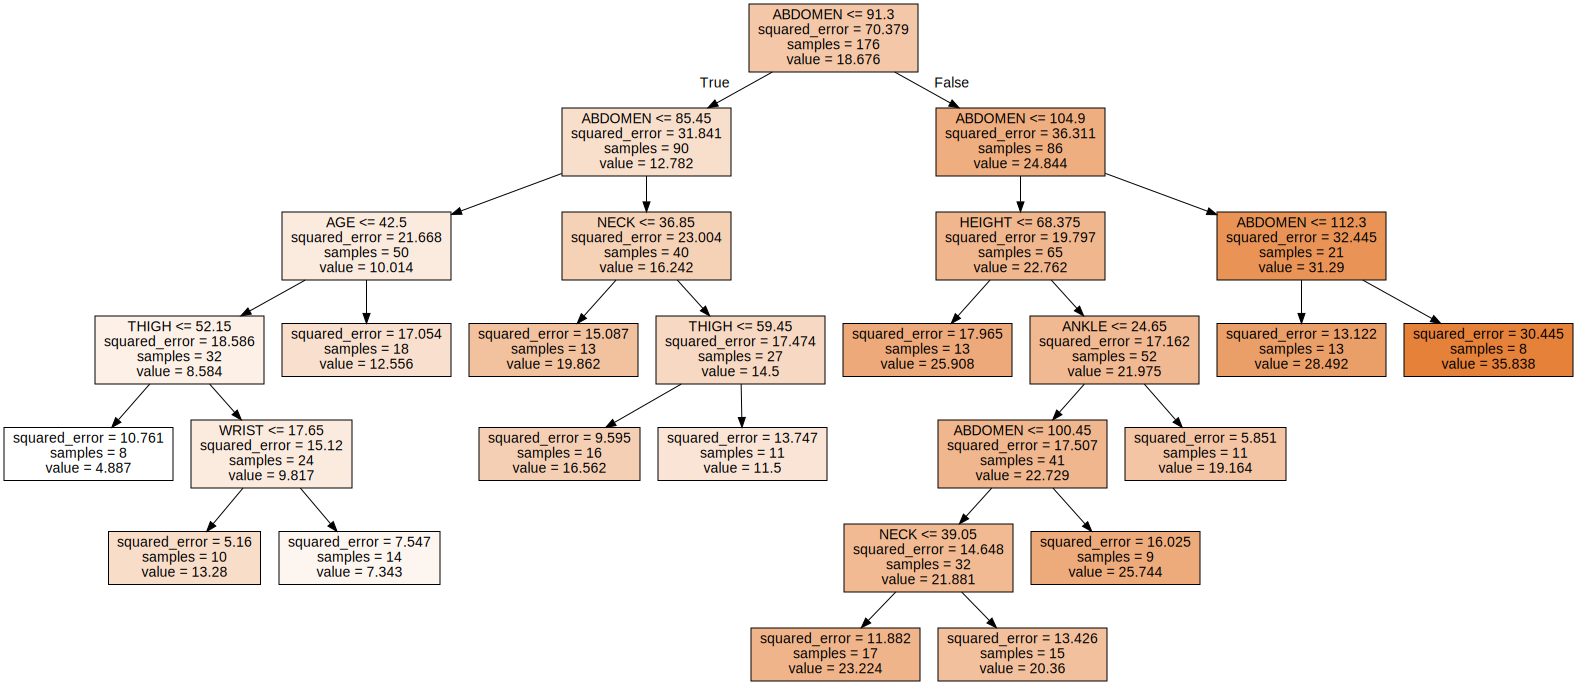

In [61]:
# 나무구조 시각화 : min_samples_leaf = 8, min_samples_split = 20

v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234,
                                   min_samples_leaf = 8,
                                   min_samples_split = 20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_split.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

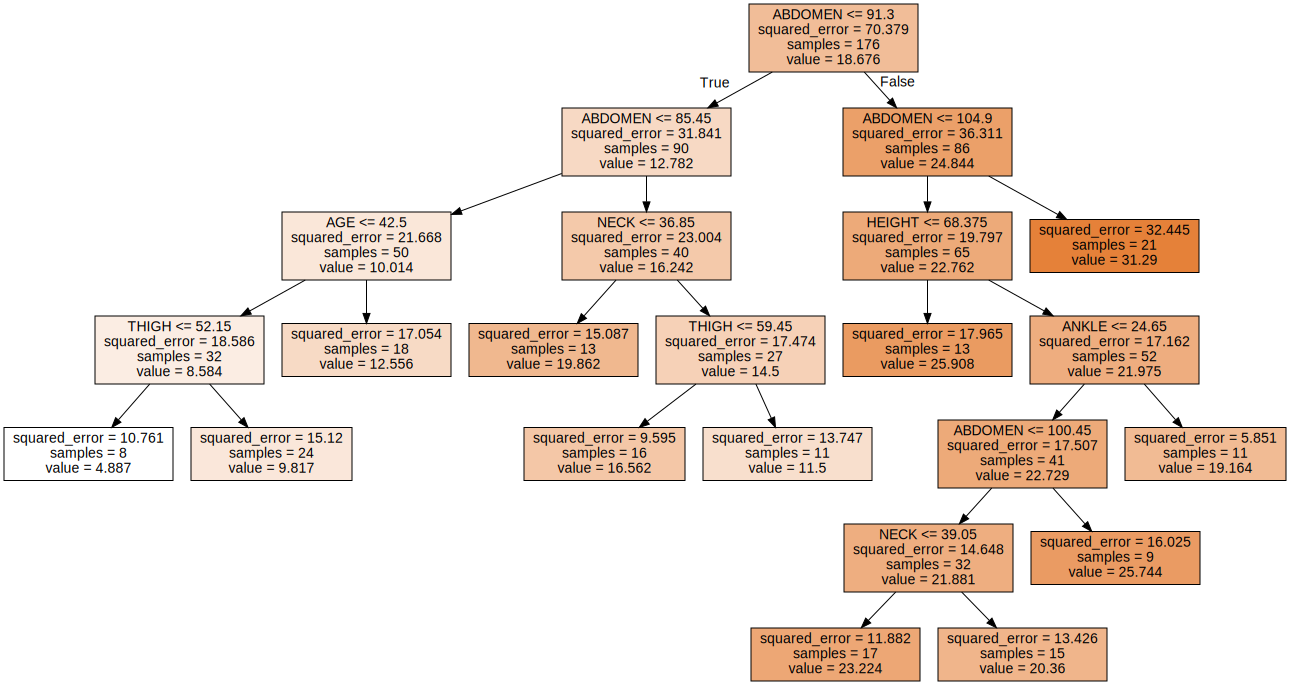

In [62]:
# 나무구조 시각화 : min_samples_leaf = 8, min_samples_split = 26

v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234,
                                   min_samples_leaf = 8,
                                   min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_split.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **모델 파라미터 조정하기 : max_depth**

In [63]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeRegressor(random_state = 1234,
                                 min_samples_leaf = 8,
                                 min_samples_split = 20,
                                 max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [64]:
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


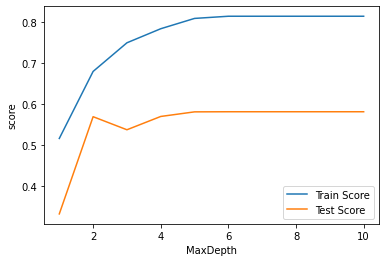

In [65]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MaxDepth')
plt.legend()

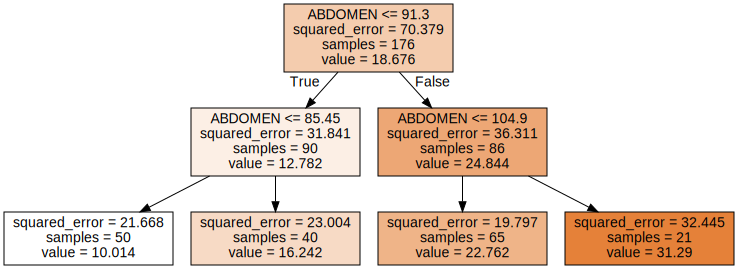

In [66]:
# 나무구조 시각화 : min_samples_leaf = 8, min_samples_split = 20, max_depth = 2

v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234,
                                   min_samples_leaf = 8,
                                   min_samples_split = 20,
                                   max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

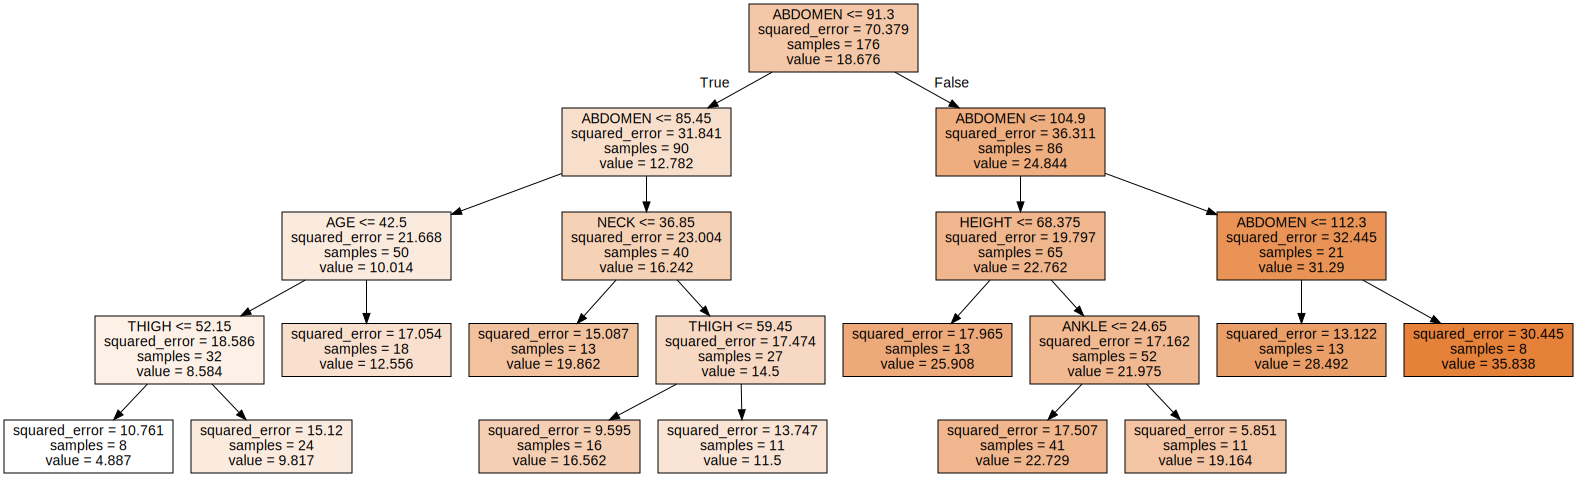

In [67]:
# 나무구조 시각화 : min_samples_leaf = 8, min_samples_split = 20, max_depth = 4

v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234,
                                   min_samples_leaf = 8,
                                   min_samples_split = 20,
                                   max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### **최종 모델 선정**

In [68]:
tree_final = DecisionTreeRegressor(random_state =1234,
                                   min_samples_leaf = 8,
                                   min_samples_split = 20,
                                   max_depth = 4)
tree_final.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.783
Score on test set : 0.570


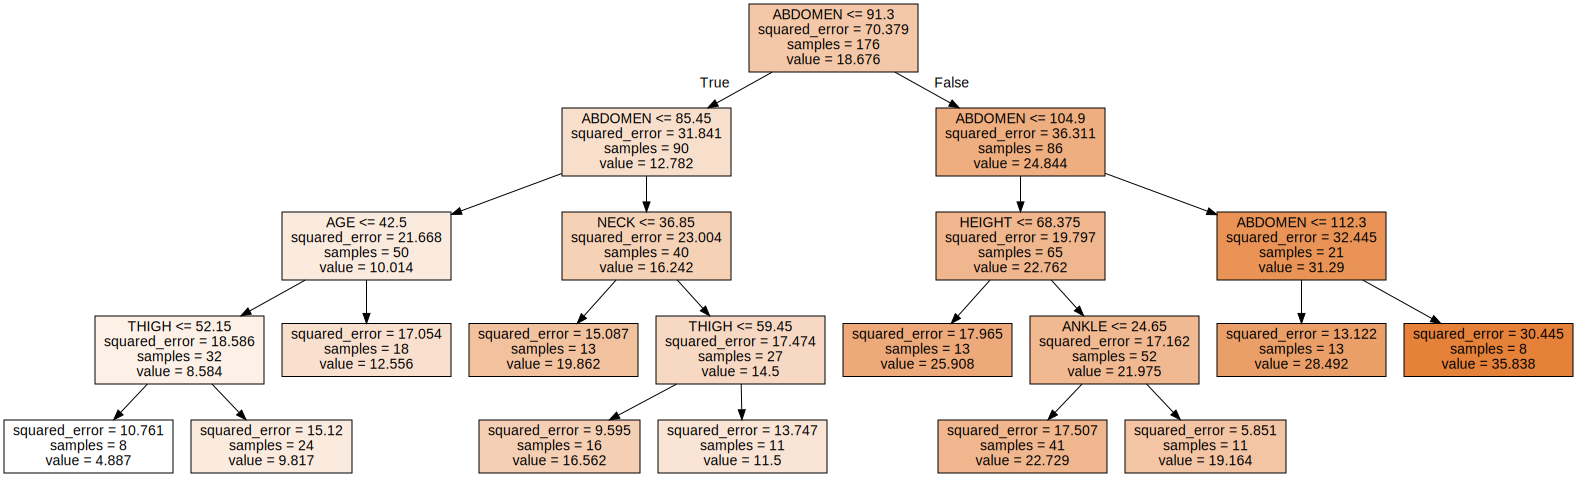

In [70]:
export_graphviz(tree_final, out_file = 'tree_final.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))